# Simple Linear Regression on 50 Startups firms 

## Definition

Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression.

The key point in Simple Linear Regression is that the dependent variable must be a continuous/real value. However, the independent variable can be measured on continuous or categorical values.
###### source: https://www.javatpoint.com/

## Objective

#### The objective is to:
* Implement Simple Linear Regression using Scikit Learn
* Use a simple feature selection method to choose the most influencing independent feature on the dependent feature 
* Create a model which will be trained and tested
* Evaluate the Model to know its efficiency in making predictions

#### Processes required to achieve the objective

1. Import necessary libraries
2. Data Importation using Pandas to create easily readable dataframe
2. Checking general data overview using 'describe' amd 'info' 
3. Data cleaning by removing redundant or empty data
4. Data Understanding (checking correlation) using matplotlib to create various plots 
5. check which independent parameter has the most influence on the dependent variable, required to use for the Linear Model
5. using randomness to partition the data into 80% and 20%
4. using 80% of the data for training and the remaining 20% for testing
6. Use plots to see the distribution of trained data and ascertain that data training has been achieved
7. use sklearn to call out the Linear Model
9. define our dependent and independent variables for the training model
10. check the coefficients of the model
11. plot the output of the training model
12. Evaluate the model

## Understanding the Data

##### The dataset was collected on 50 Startup companies, their expenditures & profits. it is available for use for registered members on Kaggle

it includes their:

* R&D spend
* Administration spend
* Marketing spend
* State/location
* Profit earned

#### Libraries Import

In [49]:
import pandas as pd # for reading data
import numpy as np # for doing vital mathematical operations
import matplotlib.pyplot as plt # for plotting graphs

#### Data Import

In [50]:
# lets define our dataframe with df and use pandas to read the data
df = pd.read_csv('50_Startups.csv')

## Data Exploration

In [85]:
# lets look at the first 10 rows of our data
df.head(10)

,ResearchDevelopment,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [86]:
# We can see that our data includes 4 numerical variable columns and one categorical column -State

#### checking out what unique categorical variables are in the State column

In [53]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [54]:
df.describe()

,ResearchDevelopment,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResearchDevelopment  50 non-null     float64
 1   Administration       50 non-null     float64
 2   Marketing            50 non-null     float64
 3   State                50 non-null     object 
 4   Profit               50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Data Preprocessing / Data Cleaning / Data Screening

* One of the main things to do when working on Mching Learning is to get the data ready for the process.
* In this case our data is clean and we dont have to do a lot in the preprocessing stage

In [56]:
#However lets check for NaN/missing values in the entire DataFrame: 
df.isnull().values.any()

False

## Data Visualisation

* very important to have a visualise form of the data since a picture is worth a thousand words

### plots of a few variables against price

In [57]:
viz = df[['ResearchDevelopment','Administration','Marketing','Profit']]

In [58]:
viz.head()

,ResearchDevelopment,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


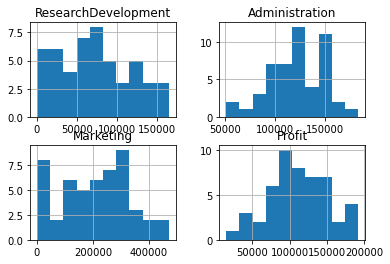

In [59]:
viz.hist()
plt.show()

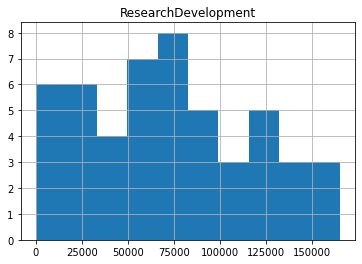

In [88]:
viz = df[['ResearchDevelopment']]
viz.hist()
plt.show()

## Feature Selection: Defining elements of our model

* its important to know what is our dependent variable and what is our independent variable
* profit is the yardstick that defines a company's success so we use profit as dependent and anoother parameter as independent

Text(0, 0.5, 'Profit')

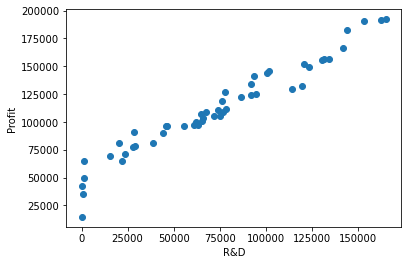

In [61]:
plt.scatter(df.ResearchDevelopment, df.Profit)

# adding x and y lables to the plot
plt.xlabel("R&D")
plt.ylabel("Profit")


Text(0, 0.5, 'Profit')

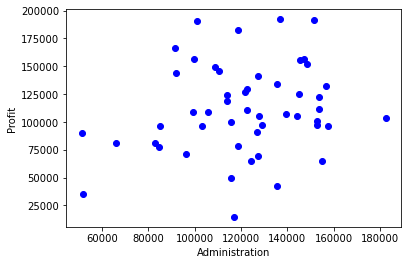

In [62]:
plt.scatter(df.Administration, df.Profit,  color='blue')

# adding x and y lables to the plot
plt.xlabel("Administration")
plt.ylabel("Profit")


Text(0, 0.5, 'Profit')

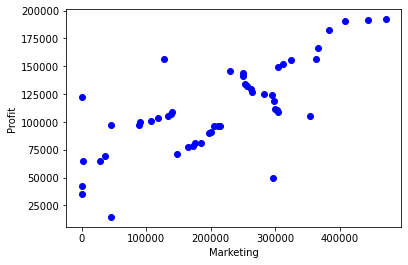

In [63]:
plt.scatter(df.Marketing, df.Profit,  color='blue')

# adding x and y lables to the plot
plt.xlabel("Marketing")
plt.ylabel("Profit")

* Since we need only one independent variable for the Simple Linear Regression model we have to be very prudent in our choice
* By visualy inspecting the data using the plots above we can see that the three variables, R&D, Administration, Marketing..
 are all positively correlated to our dependent variable Prifit
* But we need to know which of them has the highest impact since in Simple Linear Regression we need only one variable

#### Using Correlation to select the most influencing feature on our dependent variable

In [65]:
df.corr()['Profit']

ResearchDevelopment    0.972900
Administration         0.200717
Marketing              0.747766
Profit                 1.000000
Name: Profit, dtype: float64

* from the correlation results Research and Development is the most hghly correlated(97%) to our dependent variable Profit
* so we use Research and Developemt for our model

## Training & Testing Split of Data

* for the ML process it is neccessary to split the data into training and testing data
* the training set is used for training purposes and the testing data to test it after the training
* since the testing data was not part of the training process, it provides a more accurate evaluation

In [67]:
# First lets create a mask function called msk using random which selects random rows
msk = np.random.rand(len(df)) < 0.8

# after creating the mask with 80% of the entire data above, we train the data on the mask(80%) and test on remaining(20%)
train = df[msk]
test = df[~msk]

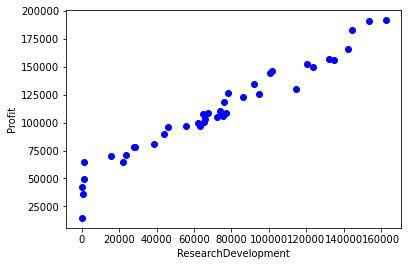

In [68]:
# lets visualise our trained data on the Research and Development feature
plt.scatter(train.ResearchDevelopment, train.Profit,  color='blue')
plt.xlabel("ResearchDevelopment")
plt.ylabel("Profit")
plt.show()

## Modeling

Using sklearn package to model data.


* The model is based on a simple linear Equation Y = mX + c

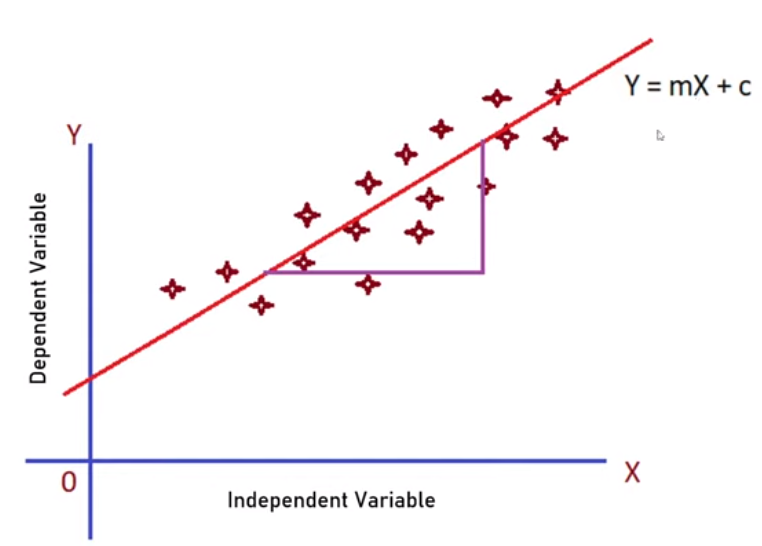

In [70]:
from sklearn import linear_model

regr = linear_model.LinearRegression()


### Train the Model

In [71]:
train_x = np.asanyarray(train[['ResearchDevelopment']])
train_y = np.asanyarray(train[['Profit']])

### Fit the Model

In [72]:
regr.fit (train_x, train_y)

LinearRegression()

### Model coefficient and Intercept

In [73]:
# Check which coefficients
print ('Coefficient(m): ', regr.coef_)
print ('Intercept(c): ',regr.intercept_)

Coefficient(m):  [[0.88424606]]
Intercept(c):  [46414.65562411]


Text(0, 0.5, 'Profit')

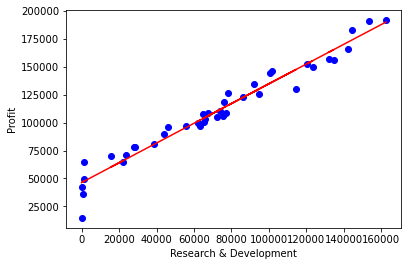

In [74]:
plt.scatter(train.ResearchDevelopment, train.Profit,  color='blue')

# just as y = mx + c we have for train_x, then regr.coef_[0][0] as m times train_x then plus intercept then colour red (-r)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')


plt.xlabel("Research & Development")
plt.ylabel("Profit")

## Model Evaluation

* The actual values are compared to the predicted values to calculate the accuracy of the regression model. 
* i.e we see how far the predicted values drift from th actual values(the model line)
* There are many types of Evaluation metrics. In this case we will look at three i. Mean absolute error ii.Residual sum of squares (MSE)
 iii. R2-score
* These Evaluation metrics play a key role in model development, as they give insight to areas that require improvement.

In [76]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ResearchDevelopment']])
test_y = np.asanyarray(test[['Profit']])

In [77]:
test_y_hat = regr.predict(test_x)

In [78]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))

Mean absolute error: 9408.82


In [79]:
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))


Residual sum of squares (MSE): 134791454.95


In [80]:
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))

R2-score: 0.91


### Remarks

* Looking at the results in particular the R-Squared results
* R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. 
* The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
* We evaluated our data using three different metrics. We can see from the R2-Score that our model scored 91%
* which is very high and an indication that we can rely on our model to make predictions